In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from faker import Faker

# --- INICIALIZACIÓN DE FAKER PARA CHILE ---
fake = Faker('es_CL')

# --- 1. NUEVO Catálogo de Productos de Bazar (tu lista completa) ---
# --- 1. Catálogo de Productos del Bazar Chileno (Ampliado) ---
productos_bazar = {
    'LIBRERIA_ESCOLAR': [
        # --- Existentes ---
        ('Cuaderno Universitario 100 Hojas', 1800), ('Lápiz Grafito HB', 400),
        ('Goma de Borrar', 500), ('Pegamento en Barra', 1000),
        ('Lápices de Colores (12 un.)', 2500), ('Cinta Adhesiva (Scotch)', 900),
        ('Cartulina (Pliego)', 700), ('Tijeras Escolares', 1200),
        # --- Nuevos ---
        ('Block de Dibujo N°99', 1500), ('Sacapuntas Metálico', 600),
        ('Corrector Líquido (Liquid Paper)', 1300), ('Destacador (Varios Colores)', 800),
        ('Regla 30cm', 700), ('Compás Escolar', 1500),
        ('Carpeta con Acoclip', 1000), ('Forro Plástico para Cuaderno', 800),
        ('Plasticina (Barra)', 600), ('Stickers (Plancha)', 1000)
    ],
    'MERCERIA_HOGAR': [
        # --- Existentes ---
        ('Hilos de Coser (Varios Colores)', 600), ('Agujas de Coser (Set)', 1000),
        ('Elástico (Metro)', 700), ('Paño de Cocina', 1500),
        ('Encendedor', 800), ('Bombilla (Ampolleta) LED', 2000),
        ('Pilas AAA (Par)', 1200),
        # --- Nuevos ---
        ('Imperdibles (Set)', 800), ('Huincha de Medir de Costura', 1200),
        ('Paño Amarillo Multiuso', 1000), ('Esponja para Loza (Pack 2 un.)', 1200),
        ('Virutilla (Pack)', 900), ('Bolsas de Basura (Rollo)', 1800),
        ('Fósforos (Caja)', 300), ('Velas Largas (Par)', 1000),
        ('Trampa para Ratones', 2000)
    ],
    'JUGUETERIA_REGALOS': [
        # --- Existentes ---
        ('Autito de Juguete (Matchbox/Hotwheels)', 1500), ('Burbujas', 1000),
        ('Naipes Español', 1500), ('Papel de Regalo (Pliego)', 800),
        ('Cinta de Regalo (Rollo)', 1000), ('Globo Metálico', 1500),
        ('Libro para Colorear', 2000),
        # --- Nuevos ---
        ('Pelota de Plástico', 1800), ('Set de Tizas de Colores', 1200),
        ('Yo-Yo', 1500), ('Trompo de Madera', 2000),
        ('Cuerda para Saltar', 2500), ('Álbum de Láminas (Stickers)', 1500),
        ('Sobre de Láminas', 700), ('Naipes Inglés (Póker)', 2000),
        ('Pistola de Agua Pequeña', 2500)
    ],
    'CUIDADO_PERSONAL_BAZAR': [
        # --- Existentes ---
        ('Peineta', 800), ('Cortaúñas', 1200),
        ('Toallitas Húmedas (Paquete pequeño)', 1500), ('Parches Curita (Caja)', 1000),
        ("Cole's o Elásticos para Pelo (Set)", 1000),
        # --- Nuevos ---
        ('Cepillo de Dientes', 1300), ('Jabón en Barra', 800),
        ('Lima de Uñas', 900), ('Pinzas para Depilar', 1500),
        ('Algodón (Bolsa Pequeña)', 1000), ('Cotonitos (Paquete)', 1200),
        ('Pañuelos Desechables (Bolsillo)', 500), ('Talco para Pies (Pequeño)', 2000)
    ],
    'ARTICULOS_VARIOS': [
        # --- Existentes ---
        ('Candado Pequeño', 2500), ('Pegamento Instantáneo (La Gotita)', 1500),
        ('Cordones para Zapatos', 1000), ('Paraguas Plegable', 5000),
        ('Calcetines (Par)', 1500),
        # --- Nuevos ---
        ('Llavero', 1500), ('Pila de Reloj (Tipo Botón)', 1800),
        ('Plantillas para Zapatos', 2000), ('Ganchos de Ropa (Set 5 un.)', 2500),
        ('Abanico', 1500), ('Bolsa de Compras Reutilizable', 2000)
    ],
    'ARTICULOS_FIESTA': [
        # --- Existentes ---
        ('Vasos Plásticos (Paquete 10 un.)', 1200), ('Platos de Cartón (Paquete 10 un.)', 1500),
        ('Servilletas de Papel Decoradas', 1300), ('Guirnalda "Feliz Cumpleaños"', 2000),
        ('Vela de Cumpleaños (Número)', 1000),
        # --- Nuevos ---
        ('Gorritos de Cumpleaños (Paquete 10 un.)', 1800), ('Serpentina (Rollo)', 800),
        ('Espantasuegras/Cornetas (Bolsa)', 1500), ('Mantel Plástico de Mesa', 2500),
        ('Piñata Pequeña', 4000), ('Bolsitas para Dulces (Paquete)', 1200)
    ],
    'MASCOTAS': [
        # --- Existentes ---
        ('Comida para Perro (Bolsa 1kg)', 3500), ('Snacks para Perro (Bolsa)', 2500),
        ('Juguete para Perro (Pelota)', 2000),
        # --- Nuevos ---
        ('Comida para Gato (Bolsa 1kg)', 4000), ('Snacks para Gato (Bolsa)', 2800),
        ('Arena para Gato (Bolsa 2kg)', 3000), ('Collar para Mascota (Pequeño)', 2500),
        ('Plato de Comida (Plástico)', 1500), ('Rascador de Cartón para Gato', 3500)
    ],
    'HERRAMIENTAS_BASICAS': [
        # --- Existentes ---
        ('Destornillador Cruz', 2000), ('Alicate Universal', 3500),
        ('Clavos (Cajita)', 1000), ('Cinta Aisladora', 1000),
        # --- Nuevos ---
        ('Destornillador Paleta', 2000), ('Martillo Pequeño', 4000),
        ('Huincha de Medir (3 Metros)', 3000), ('Cuchillo Cartonero (Tip-Top)', 1500),
        ('Tornillos (Cajita Surtida)', 1200), ('Guantes de Trabajo (Par)', 1800)
    ],
    # --- Nuevas Categorías ---
    'COCINA_BAZAR': [
        ('Taza de Cerámica', 2000), ('Vaso de Vidrio', 1200),
        ('Plato de Loza (Bajo)', 2500), ('Plato de Loza (Hondo)', 2500),
        ('Set Cubiertos (Tenedor, Cuchara, Cuchillo)', 1800), ('Tabla para Picar (Plástica)', 3000),
        ('Colador Pequeño', 1500), ('Rallador Manual', 2000),
        ('Abrelatas Manual', 1500), ('Pelador de Papas', 1000)
    ],
    'ELECTRONICA_BASICA': [
        ('Cargador de Pared USB (1A)', 3000), ('Cable USB a Micro USB (1 metro)', 2500),
        ('Cable USB a Tipo C (1 metro)', 3500), ('Audífonos con Cable (Básicos)', 4000),
        ('Adaptador de Enchufe Universal', 2500), ('Zapatilla Eléctrica (3 enchufes)', 5000),
        ('Pilas AA (Par)', 1200)
    ]
}

# --- 2. Lógica de Pesos y Mapeo de Precios ---
lista_completa_productos = []
pesos = []
mapa_precios = {}
# ¡NUEVO! Asignamos popularidad por categoría, no por tier.
# Ajustamos los pesos para incluir las nuevas categorías.
pesos_por_categoria = {
    'LIBRERIA_ESCOLAR': 12, 'COCINA_BAZAR': 10, 'MERCERIA_HOGAR': 9,
    'CUIDADO_PERSONAL_BAZAR': 8, 'ARTICULOS_VARIOS': 7, 'JUGUETERIA_REGALOS': 6,
    'ELECTRONICA_BASICA': 5, 'ARTICULOS_FIESTA': 4, 'MASCOTAS': 3,
    'HERRAMIENTAS_BASICAS': 2
}
for categoria, productos_con_precio in productos_bazar.items():
    peso_categoria = pesos_por_categoria.get(categoria, 1) # Asigna peso 1 si no se encuentra
    for producto, precio in productos_con_precio:
        lista_completa_productos.append(producto)
        mapa_precios[producto] = precio
        pesos.append(peso_categoria)

# --- 3. "Misiones de Compra" Adaptadas al Bazar (con Nuevas Misiones) ---
misiones_de_compra = {
    'Misión Tarea Escolar': [
        'Cuaderno Universitario 100 Hojas', 'Lápiz Grafito HB', 'Goma de Borrar',
        'Pegamento en Barra', 'Cartulina (Pliego)', 'Destacador (Varios Colores)'
    ],
    'Misión Arreglo Rápido': [
        'Pegamento Instantáneo (La Gotita)', 'Cinta Aisladora', 'Pilas AAA (Par)',
        'Alicate Universal'
    ],
    'Misión Cumpleaños': [
        'Papel de Regalo (Pliego)', 'Cinta de Regalo (Rollo)', 'Globo Metálico',
        'Vela de Cumpleaños (Número)', 'Guirnalda "Feliz Cumpleaños"',
        'Gorritos de Cumpleaños (Paquete 10 un.)'
    ],
    'Misión Emergencia Hogar': [
        'Bombilla (Ampolleta) LED', 'Clavos (Cajita)', 'Encendedor', 'Velas Largas (Par)'
    ],
    # --- Nuevas Misiones ---
    'Misión Amigo Secreto (Bazar)': [
        'Taza de Cerámica', 'Calcetines (Par)', 'Llavero', 'Chocolates (No listado, item imaginario)'
    ],
    'Misión Instalación Básica': [
        'Zapatilla Eléctrica (3 enchufes)', 'Destornillador Cruz',
        'Tornillos (Cajita Surtida)', 'Cinta Aisladora'
    ],
    'Misión Aseo General': [
        'Paño Amarillo Multiuso', 'Esponja para Loza (Pack 2 un.)',
        'Bolsas de Basura (Rollo)', 'Guantes de Trabajo (Par)'
    ]
}
# --- 4. Creación de Base de Clientes con Faker (sin cambios) ---
num_clientes = 500
clientes = [{'ID_Cliente': 1000 + i, 'Nombre_Cliente': fake.name()} for i in range(num_clientes)]

# --- 5. Generación de Transacciones ---
num_transacciones = 20000 # Aumentamos para el catálogo más grande
transacciones = []
id_transaccion_actual = 1
fecha_actual = datetime(2020, 1, 1) # Inicia el 1 de enero de 2020

print("Simulando ventas del Bazar de Barrio...")

for _ in range(num_transacciones):
    cliente_actual = random.choice(clientes)
    ticket_actual = {}
    
    # Lógica de Misiones + Compras Aleatorias
    if random.random() < 0.4: # 40% de las compras son por una misión
        mision = random.choice(list(misiones_de_compra.keys()))
        for producto in misiones_de_compra[mision]:
            ticket_actual[producto] = ticket_actual.get(producto, 0) + 1
            
    num_items_extra = random.choices([0, 1, 2, 3, 4], weights=[15, 40, 30, 10, 5], k=1)[0]
    if num_items_extra > 0:
        productos_extra = random.choices(lista_completa_productos, weights=pesos, k=num_items_extra)
        for producto in productos_extra:
            ticket_actual[producto] = ticket_actual.get(producto, 0) + 1
            
    if ticket_actual:
        for producto, cantidad in ticket_actual.items():
            precio_unitario = mapa_precios.get(producto, 0)
            transacciones.append([id_transaccion_actual, fecha_actual, 
                                  cliente_actual['ID_Cliente'], cliente_actual['Nombre_Cliente'],
                                  producto, cantidad, precio_unitario])
        id_transaccion_actual += 1
        fecha_actual += timedelta(minutes=random.randint(15, 240))

# --- 6. Crear el DataFrame Final ---
df_bazar = pd.DataFrame(transacciones, columns=['ID_Transaccion', 'Fecha', 'ID_Cliente', 'Nombre_Cliente', 'Producto', 'Cantidad', 'Precio_Unitario'])
df_bazar.to_csv('ventas_bazar_final.csv', index=False)

print(f"\nDataset 'ventas_bazar_final.csv' creado con éxito.")
df_bazar['Ingreso_Total_Linea'] = df_bazar['Cantidad'] * df_bazar['Precio_Unitario']
print(df_bazar.head())

Simulando ventas del Bazar de Barrio...

Dataset 'ventas_bazar_final.csv' creado con éxito.
   ID_Transaccion               Fecha  ID_Cliente  \
0               1 2020-01-01 00:00:00        1439   
1               2 2020-01-01 01:58:00        1266   
2               2 2020-01-01 01:58:00        1266   
3               3 2020-01-01 04:46:00        1401   
4               3 2020-01-01 04:46:00        1401   

                  Nombre_Cliente                  Producto  Cantidad  \
0         María Juana Ríos Muñoz        Plasticina (Barra)         1   
1       Marta Henríquez Avendaño   Algodón (Bolsa Pequeña)         1   
2       Marta Henríquez Avendaño      Block de Dibujo N°99         1   
3  Juana Olga González Navarrete  Bombilla (Ampolleta) LED         1   
4  Juana Olga González Navarrete           Clavos (Cajita)         1   

   Precio_Unitario  Ingreso_Total_Linea  
0              600                  600  
1             1000                 1000  
2             1500            

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from faker import Faker


In [3]:
df_bazar = pd.read_csv('ventas_bazar_final.csv')

In [4]:
df_bazar.drop(columns=['Nombre_Cliente','ID_Cliente'], inplace=True)  # Eliminamos la columna de precio unitario

In [5]:
df_bazar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66360 entries, 0 to 66359
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Transaccion   66360 non-null  int64 
 1   Fecha            66360 non-null  object
 2   Producto         66360 non-null  object
 3   Cantidad         66360 non-null  int64 
 4   Precio_Unitario  66360 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB


In [6]:
df_bazar.describe()

,ID_Transaccion,Cantidad,Precio_Unitario
count,66360.00000,66360.000000,66360.000000
mean,9066.00550,1.009494,1458.398131
std,5278.86963,0.098208,880.269071
min,1.00000,1.000000,0.000000
25%,4481.75000,1.000000,1000.000000
50%,9043.50000,1.000000,1200.000000
75%,13647.00000,1.000000,1800.000000
max,18197.00000,3.000000,5000.000000


In [7]:
df_bazar.nunique()

ID_Transaccion     18197
Fecha              18197
Producto             122
Cantidad               3
Precio_Unitario       20
dtype: int64

In [8]:
import seaborn as sns

<Axes: xlabel='Precio_Unitario', ylabel='Count'>

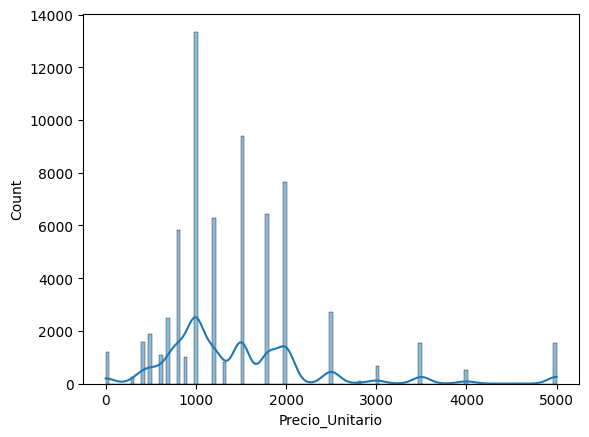

In [9]:
sns.histplot(data=df_bazar, x='Precio_Unitario', kde=True)

In [10]:
import matplotlib.pyplot as plt

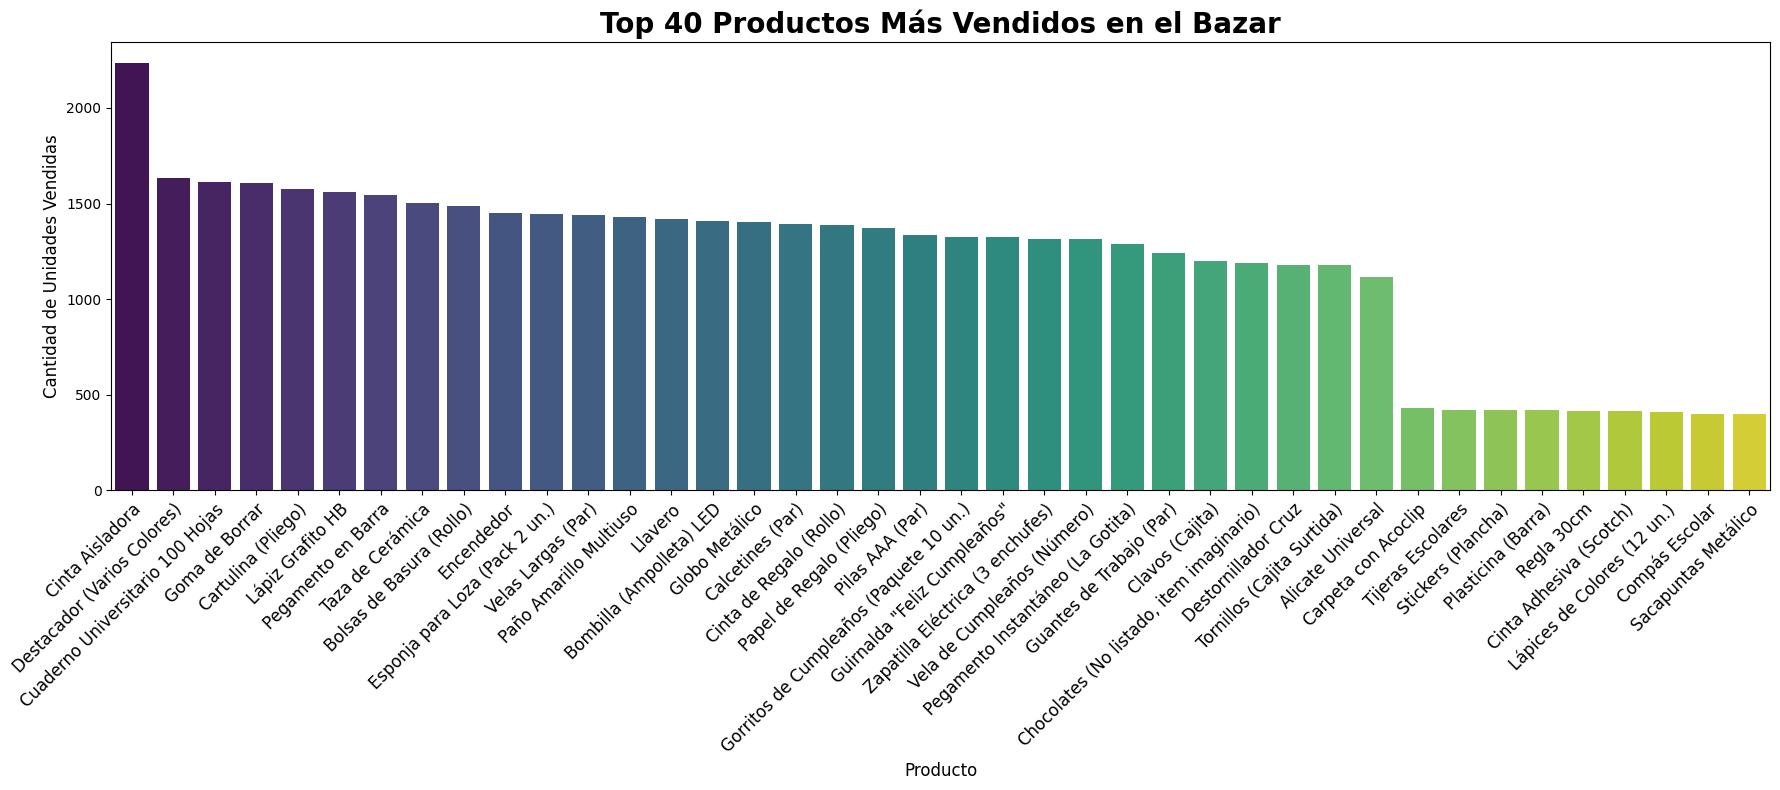

In [11]:
top_productos = df_bazar["Producto"].value_counts().head(40)

plt.figure(figsize=(18, 8))

sns.barplot(x=top_productos.index, y=top_productos.values, palette='viridis', hue=top_productos.index, dodge=False, legend=False)

plt.title('Top 40 Productos Más Vendidos en el Bazar', fontsize=20, weight='bold')
plt.ylabel('Cantidad de Unidades Vendidas', fontsize=12)
plt.xlabel('Producto', fontsize=12)

plt.xticks(
    rotation=45, 
    ha='right', #
    rotation_mode='anchor',
    fontsize=12
)

plt.tight_layout()
plt.show()


In [12]:
df_bazar

,ID_Transaccion,Fecha,Producto,Cantidad,Precio_Unitario
0,1,2020-01-01 00:00:00,Plasticina (Barra),1,600
1,2,2020-01-01 01:58:00,Algodón (Bolsa Pequeña),1,1000
2,2,2020-01-01 01:58:00,Block de Dibujo N°99,1,1500
3,3,2020-01-01 04:46:00,Bombilla (Ampolleta) LED,1,2000
4,3,2020-01-01 04:46:00,Clavos (Cajita),1,1000
...,...,...,...,...,...
66355,18196,2024-05-21 22:14:00,Cable USB a Micro USB (1 metro),1,2500
66356,18196,2024-05-21 22:14:00,Block de Dibujo N°99,1,1500
66357,18196,2024-05-21 22:14:00,Naipes Español,1,1500
66358,18196,2024-05-21 22:14:00,Lápiz Grafito HB,1,400


In [13]:
import matplotlib.ticker as mticker

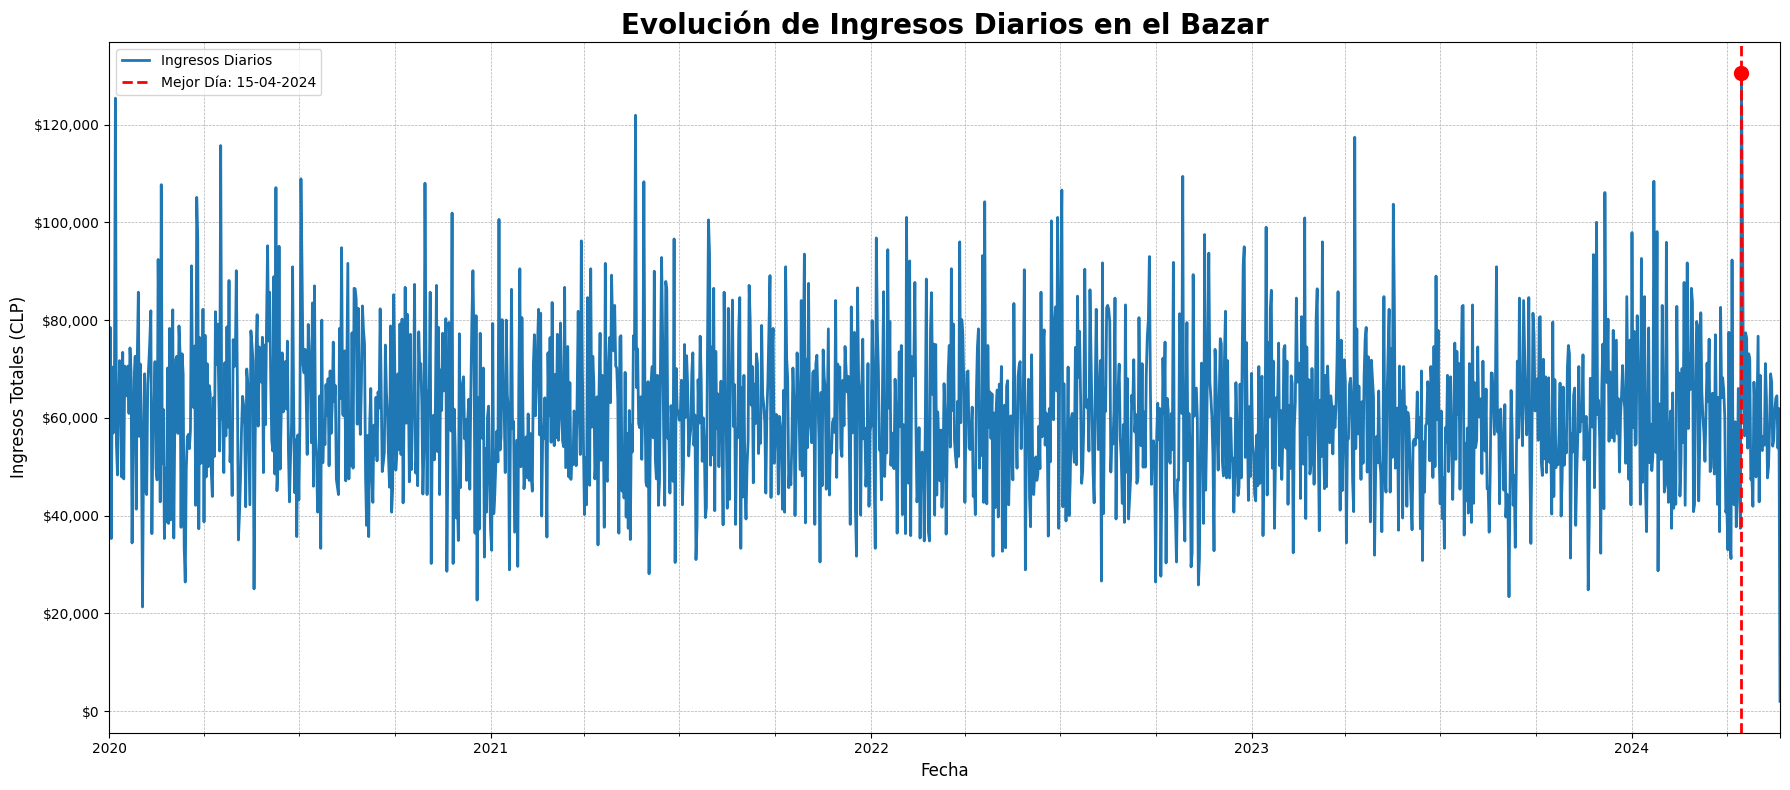

--- Día de Mayor Productividad ---
La fecha con mayores ingresos fue el Monday, 15 de April de 2024.
Ese día, el bazar generó un total de $130,500 CLP.


In [14]:

df_bazar['Fecha'] = pd.to_datetime(df_bazar['Fecha'])
df_bazar['Ingreso_Total'] = df_bazar['Cantidad'] * df_bazar['Precio_Unitario']

# 2. Agrupar los ingresos por día para crear la serie de tiempo
# Usamos resample('D') para agrupar por día (Day) y sumamos los ingresos.
ingresos_diarios = df_bazar.set_index('Fecha')['Ingreso_Total'].resample('D').sum()

# 3. Encontrar el día de mayores ingresos y su valor
mejor_dia = ingresos_diarios.idxmax()
max_ingreso = ingresos_diarios.max()

# 4. Crear el gráfico
plt.figure(figsize=(18, 8))
ingresos_diarios.plot(linewidth=2, label='Ingresos Diarios')

# 5. Destacar el día con mayores ingresos en el gráfico
plt.axvline(mejor_dia, color='red', linestyle='--', linewidth=2, label=f'Mejor Día: {mejor_dia.strftime("%d-%m-%Y")}')
plt.scatter(mejor_dia, max_ingreso, color='red', s=100, zorder=5) # 's' es el tamaño del punto, 'zorder' lo pone al frente

# 6. Personalizar el gráfico para mayor claridad
plt.title('Evolución de Ingresos Diarios en el Bazar', fontsize=20, weight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos Totales (CLP)', fontsize=12)
# Formatear el eje Y para que muestre los números como moneda
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 7. Imprimir el resultado
print("--- Día de Mayor Productividad ---")
print(f"La fecha con mayores ingresos fue el {mejor_dia.strftime('%A, %d de %B de %Y')}.")
print(f"Ese día, el bazar generó un total de ${max_ingreso:,.0f} CLP.")

C:\Users\Diego\AppData\Local\Temp\ipykernel_14616\2407229502.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ingresos_mensuales = df_bazar.set_index('Fecha')['Ingreso_Total'].resample('M').sum()


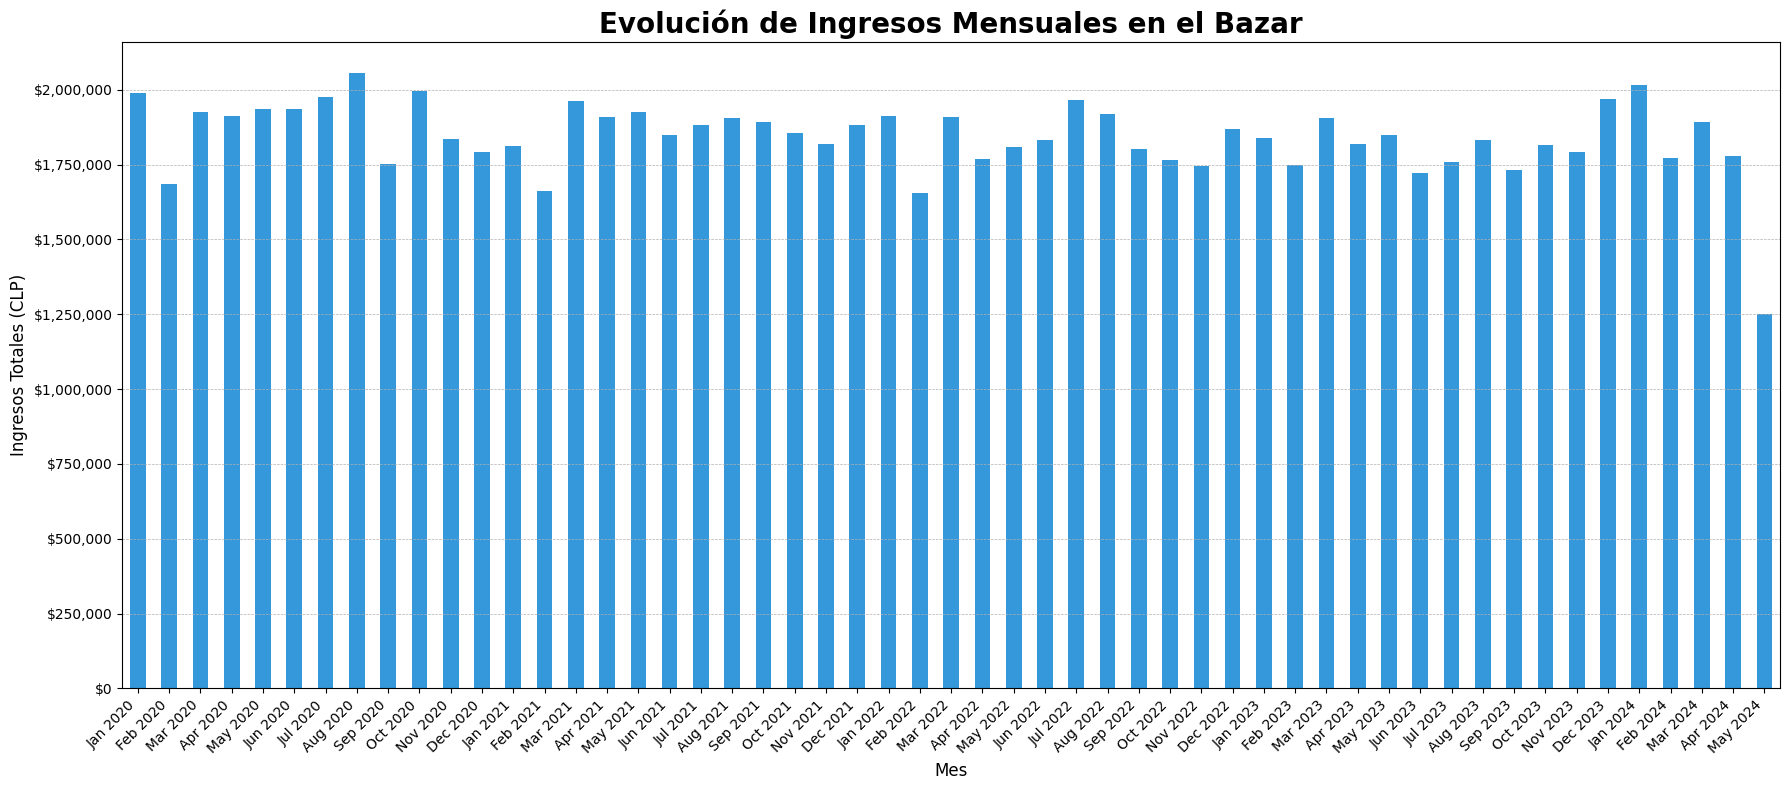

--- Mes de Mayor Productividad ---
El mes con mayores ingresos fue August de 2020.
Ese mes, el bazar generó un total de $2,057,000 CLP.


In [15]:
ingresos_mensuales = df_bazar.set_index('Fecha')['Ingreso_Total'].resample('M').sum()

# 2. Encontrar el MES de mayores ingresos y su valor
mejor_mes = ingresos_mensuales.idxmax()
max_ingreso_mensual = ingresos_mensuales.max()

# 3. Crear el gráfico de barras mensual
plt.figure(figsize=(18, 8))

# Usamos un gráfico de barras que es ideal para comparar meses
ingresos_mensuales.plot(kind='bar', color='#3498db')

# 4. Personalizar el gráfico
plt.title('Evolución de Ingresos Mensuales en el Bazar', fontsize=20, weight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingresos Totales (CLP)', fontsize=12)

# Formatear el eje Y para que muestre los números como moneda
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# --- LA CORRECCIÓN CLAVE ESTÁ AQUÍ ---
# Formateamos las etiquetas del eje X para que muestren "Mes Año"
date_labels = [d.strftime('%b %Y') for d in ingresos_mensuales.index]
plt.gca().set_xticklabels(date_labels, rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 5. Imprimir el resultado (corregido para reflejar el análisis mensual)
print("--- Mes de Mayor Productividad ---")
print(f"El mes con mayores ingresos fue {mejor_mes.strftime('%B de %Y')}.")
print(f"Ese mes, el bazar generó un total de ${max_ingreso_mensual:,.0f} CLP.")


C:\Users\Diego\AppData\Local\Temp\ipykernel_14616\3118719696.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.boxplot(x='Mes', y='Ingreso_Total', data=df_bazar.groupby(['Año', 'Mes'])['Ingreso_Total'].sum().reset_index(), palette='viridis')
C:\Users\Diego\AppData\Local\Temp\ipykernel_14616\3118719696.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mes', y='Ingreso_Total', data=df_bazar.groupby(['Año', 'Mes'])['Ingreso_Total'].sum().reset_index(), palette='viridis')


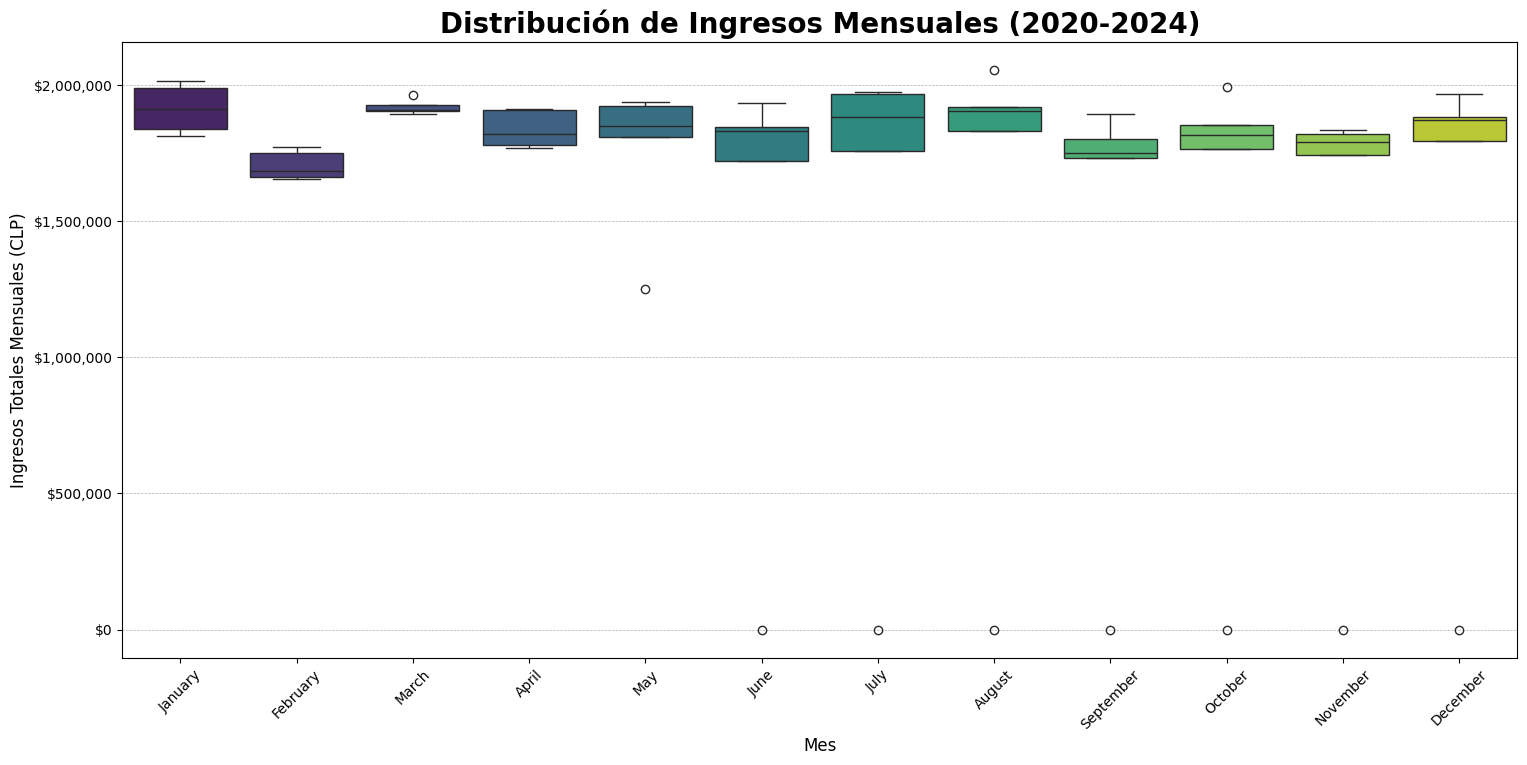

In [16]:

# Creamos una columna con el nombre del mes para agrupar
df_bazar['Mes'] = df_bazar['Fecha'].dt.month_name()
# Y otra con el año para filtrar
df_bazar['Año'] = df_bazar['Fecha'].dt.year

# Ordenamos los meses cronológicamente
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df_bazar['Mes'] = pd.Categorical(df_bazar['Mes'], categories=meses_ordenados, ordered=True)

# Creamos el boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Mes', y='Ingreso_Total', data=df_bazar.groupby(['Año', 'Mes'])['Ingreso_Total'].sum().reset_index(), palette='viridis')

plt.title('Distribución de Ingresos Mensuales (2020-2024)', fontsize=20, weight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingresos Totales Mensuales (CLP)', fontsize=12)
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Asumimos que ya tienes las series 'ingresos_abril' e 'ingresos_mayo' calculadas del paso anterior

# 1. Combinamos los datos en un solo DataFrame para facilitar la visualización
df_abril = ingresos_abril.reset_index()
df_abril['Mes'] = 'Abril 2024'

df_mayo = ingresos_mayo.reset_index()
df_mayo['Mes'] = 'Mayo 2024'

df_comparativo = pd.concat([df_abril, df_mayo])

# 2. Creamos el gráfico de barras comparativo
plt.figure(figsize=(20, 10))
sns.barplot(data=df_comparativo, x='Categoria', y='Ingreso_Total', hue='Mes', palette=['#3498db', '#95a5a6'])

# 3. Personalizamos el gráfico
plt.title('Comparación de Ingresos Absolutos por Categoría', fontsize=22, weight='bold')
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Ingresos Totales (CLP)', fontsize=12)

# Formatear el eje Y
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.legend(title='Mes', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 4. (Opcional) Calcular y mostrar la caída porcentual para un diagnóstico más preciso
diferencia = ((ingresos_mayo - ingresos_abril) / ingresos_abril * 100).sort_values()
print("--- Diagnóstico: Variación de Ingresos por Categoría (Mayo vs. Abril) ---\n")
print(diferencia.to_string(float_format='%.2f%%'))

NameError: name 'ingresos_abril' is not defined

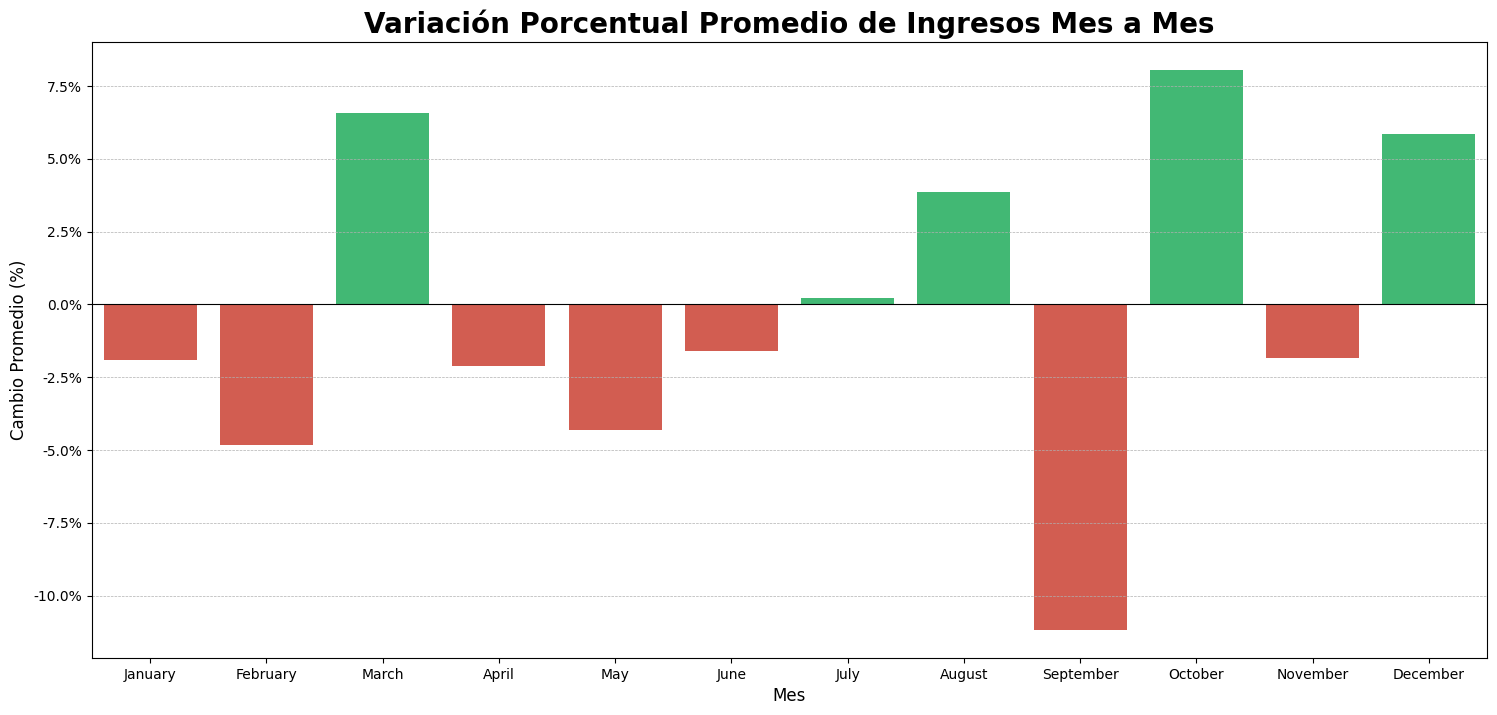

--- Patrón Estacional: Variación Promedio Mes a Mes ---
Mes
January      -1.90%
February     -4.83%
March         6.59%
April        -2.10%
May          -4.30%
June         -1.60%
July          0.21%
August        3.86%
September   -11.17%
October       8.06%
November     -1.85%
December      5.85%


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Asumimos que ya tienes la serie 'ingresos_mensuales' calculada

# 1. Calcular el cambio porcentual mes a mes
cambio_mensual_pct = ingresos_mensuales.pct_change() * 100

# 2. Agrupar estos cambios por mes del año y calcular el promedio
# Esto nos dirá, en promedio, cuánto suben o bajan las ventas en cada mes del año
df_cambio = cambio_mensual_pct.reset_index()
df_cambio['Mes'] = df_cambio['Fecha'].dt.month_name()
promedio_cambio_por_mes = df_cambio.groupby('Mes')['Ingreso_Total'].mean()

# Ordenar los meses para el gráfico
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
promedio_cambio_por_mes = promedio_cambio_por_mes.reindex(meses_ordenados)

# 3. Crear el gráfico de barras para visualizar el patrón
plt.figure(figsize=(18, 8))
colores = ['#e74c3c' if x < 0 else '#2ecc71' for x in promedio_cambio_por_mes.values]
sns.barplot(x=promedio_cambio_por_mes.index, y=promedio_cambio_por_mes.values, palette=colores, hue=promedio_cambio_por_mes.index, dodge=False, legend=False)

# 4. Personalizar el gráfico
plt.title('Variación Porcentual Promedio de Ingresos Mes a Mes', fontsize=20, weight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cambio Promedio (%)', fontsize=12)
formatter = mticker.FuncFormatter(lambda x, p: f'{x:.1f}%')
plt.gca().yaxis.set_major_formatter(formatter)
plt.axhline(0, color='black', linewidth=0.8) # Línea en el 0 para ver caídas vs. subidas
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

# 5. Imprimir la tabla con los datos para mayor claridad
print("--- Patrón Estacional: Variación Promedio Mes a Mes ---")
print(promedio_cambio_por_mes.to_string(float_format='%.2f%%'))

In [ ]:
from collections import Counter

# Asumimos que ya tienes la columna 'Categoria' creada del análisis anterior

# 1. Agrupamos por transacción y obtenemos las categorías únicas de cada compra
categorias_por_transaccion = df_bazar.groupby('ID_Transaccion')['Categoria'].unique().apply(list)

# 2. Contamos las combinaciones de categorías más comunes
# Convertimos cada lista de categorías en un 'frozenset' para poder contarlas
combinaciones = Counter(frozenset(cats) for cats in categorias_por_transaccion)

# 3. Mostramos las 10 combinaciones más frecuentes
print("--- Top 10 Combinaciones de Categorías por Transacción ---\n")
for combo, count in combinaciones.most_common(10):
    # Imprimimos el resultado de forma legible
    print(f"Combinación: {list(combo)}")
    print(f"Frecuencia: {count} transacciones\n")

--- Top 10 Combinaciones de Categorías por Transacción ---

Combinación: ['LIBRERIA_ESCOLAR']
Frecuencia: 1712 transacciones

Combinación: ['MERCERIA_HOGAR']
Frecuencia: 883 transacciones

Combinación: ['CUIDADO_PERSONAL_BAZAR']
Frecuencia: 619 transacciones

Combinación: ['COCINA_BAZAR']
Frecuencia: 611 transacciones

Combinación: ['JUGUETERIA_REGALOS']
Frecuencia: 592 transacciones

Combinación: ['MERCERIA_HOGAR', 'HERRAMIENTAS_BASICAS']
Frecuencia: 580 transacciones

Combinación: ['MERCERIA_HOGAR', 'LIBRERIA_ESCOLAR']
Frecuencia: 542 transacciones

Combinación: ['MERCERIA_HOGAR', 'HERRAMIENTAS_BASICAS', 'ARTICULOS_VARIOS']
Frecuencia: 478 transacciones

Combinación: ['ARTICULOS_VARIOS']
Frecuencia: 448 transacciones

Combinación: ['LIBRERIA_ESCOLAR', 'MERCERIA_HOGAR', 'HERRAMIENTAS_BASICAS']
Frecuencia: 398 transacciones



C:\Users\Diego\AppData\Local\Temp\ipykernel_14288\379180405.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_dia = df_bazar.groupby(['DiaSemana', 'Producto'])['Producto'].count().rename('TotalVendido').reset_index()
C:\Users\Diego\AppData\Local\Temp\ipykernel_14288\379180405.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_por_dia = ventas_por_dia.groupby('DiaSemana', observed=False).apply(lambda x: x.nlargest(5, 'TotalVendido')).reset_index(drop=True)


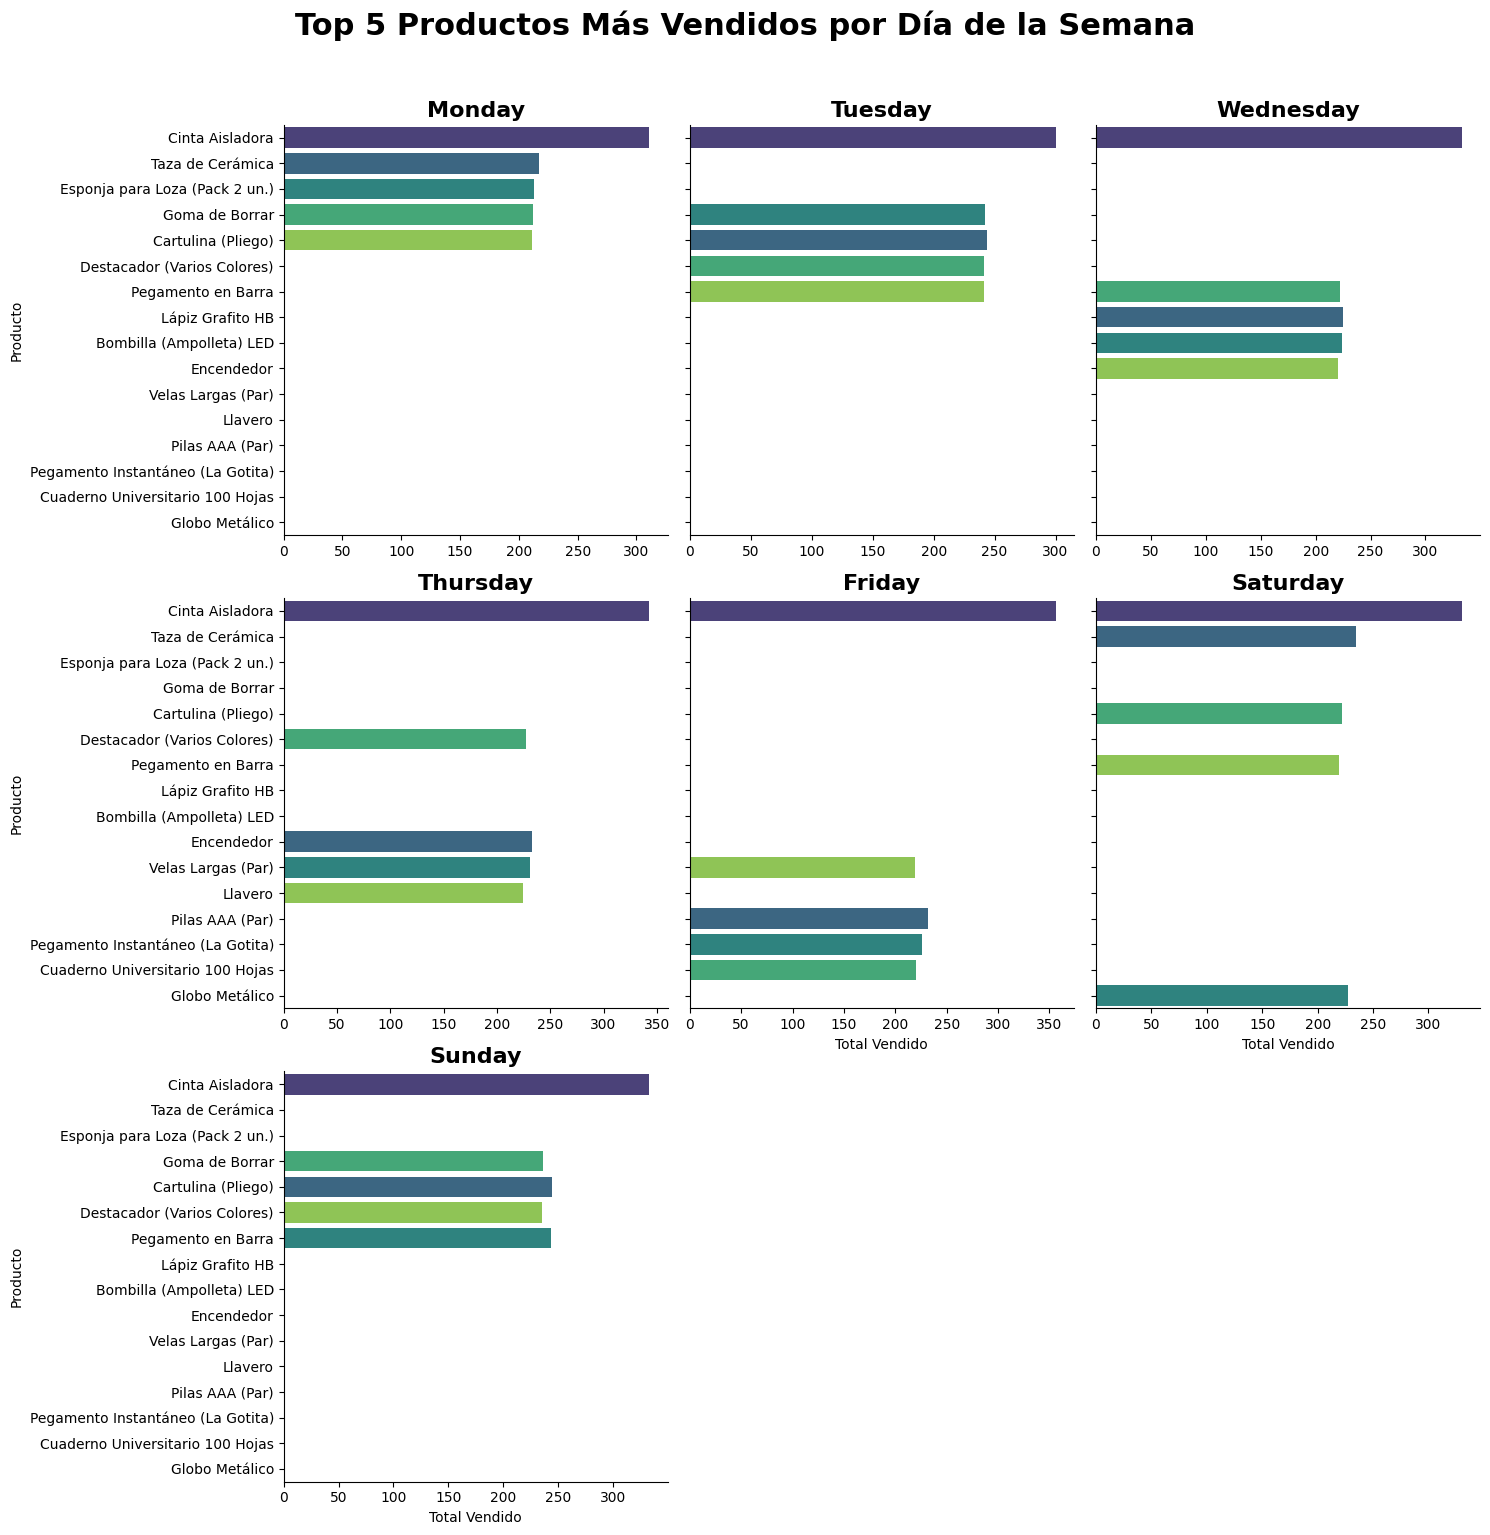

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que tu DataFrame 'df_bazar' ya está cargado y la columna 'Fecha' es de tipo datetime.

# --- LA CORRECCIÓN ESTÁ AQUÍ ---
# 1. Nos aseguramos de que la columna 'DiaSemana' exista y esté ordenada.
df_bazar['DiaSemana'] = df_bazar['Fecha'].dt.day_name()
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_bazar['DiaSemana'] = pd.Categorical(df_bazar['DiaSemana'], categories=dias_ordenados, ordered=True)
# --------------------------------

# 2. Contamos las ventas de cada producto para cada día de la semana
ventas_por_dia = df_bazar.groupby(['DiaSemana', 'Producto'])['Producto'].count().rename('TotalVendido').reset_index()

# 3. Para cada día, nos quedamos con los 5 productos más vendidos
top5_por_dia = ventas_por_dia.groupby('DiaSemana', observed=False).apply(lambda x: x.nlargest(5, 'TotalVendido')).reset_index(drop=True)

# 4. Creamos el gráfico facetado con Seaborn
g = sns.FacetGrid(top5_por_dia, col="DiaSemana", col_wrap=3, height=5, sharex=False, col_order=dias_ordenados)
g.map_dataframe(sns.barplot, x="TotalVendido", y="Producto", palette="viridis", hue="Producto", dodge=False, legend=False)
g.set_titles("{col_name}", size=16, weight='bold')
g.set_axis_labels("Total Vendido", "Producto")
g.fig.suptitle('Top 5 Productos Más Vendidos por Día de la Semana', y=1.02, fontsize=22, weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
from apyori import apriori
import pandas as pd

# Asegúrate de tener tu DataFrame 'df_bazar' cargado

# 1. Preparamos los datos en formato de "lista de canastas"
transacciones_lista = df_bazar.groupby('ID_Transaccion')['Producto'].apply(list).tolist()

# 2. Ejecutamos el algoritmo Apriori
# Estos parámetros buscan reglas relativamente frecuentes y con una fuerte conexión
reglas = apriori(transactions=transacciones_lista, 
                 min_support=0.005,      # La combinación debe estar en al menos 0.5% de los tickets
                 min_confidence=0.40,    # 40% de confianza en la regla
                 min_lift=5,             # La asociación debe ser 5 veces más fuerte que la casualidad
                 min_length=2, max_length=2)

resultados = list(reglas)

# 3. Presentamos los resultados de forma clara
print("--- REGLAS DE ASOCIACIÓN ESTRATÉGICAS ENCONTRADAS ---\n")
if not resultados:
    print("No se encontraron reglas con los parámetros actuales. Intenta bajar un poco el 'min_lift' o 'min_confidence'.")
else:
    for item in resultados:
        for stat in item.ordered_statistics:
            lhs = [x for x in stat.items_base]
            rhs = [x for x in stat.items_add]
            
            if not lhs or not rhs:
                continue

            soporte = item.support
            confianza = stat.confidence
            lift = stat.lift
            
            print(f"Regla: {{{lhs[0]}}} -> {{{rhs[0]}}}")
            print(f"Confianza: {confianza:.0%}")
            print(f"Lift: {lift:.1f} (Asociación muy fuerte)")
            print("-" * 30)

--- REGLAS DE ASOCIACIÓN ESTRATÉGICAS ENCONTRADAS ---

Regla: {Alicate Universal} -> {Cinta Aisladora}
Confianza: 95%
Lift: 7.5 (Asociación muy fuerte)
------------------------------
Regla: {Cinta Aisladora} -> {Alicate Universal}
Confianza: 50%
Lift: 7.5 (Asociación muy fuerte)
------------------------------
Regla: {Alicate Universal} -> {Pegamento Instantáneo (La Gotita)}
Confianza: 95%
Lift: 12.4 (Asociación muy fuerte)
------------------------------
Regla: {Pegamento Instantáneo (La Gotita)} -> {Alicate Universal}
Confianza: 83%
Lift: 12.4 (Asociación muy fuerte)
------------------------------
Regla: {Alicate Universal} -> {Pilas AAA (Par)}
Confianza: 95%
Lift: 11.8 (Asociación muy fuerte)
------------------------------
Regla: {Pilas AAA (Par)} -> {Alicate Universal}
Confianza: 79%
Lift: 11.8 (Asociación muy fuerte)
------------------------------
Regla: {Bolsas de Basura (Rollo)} -> {Esponja para Loza (Pack 2 un.)}
Confianza: 80%
Lift: 10.4 (Asociación muy fuerte)
-----------------